In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../input/boston_housing.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB
None


In [3]:
avg_rooms = dataset['rm'].values
med_value_owner = dataset['medv'].values

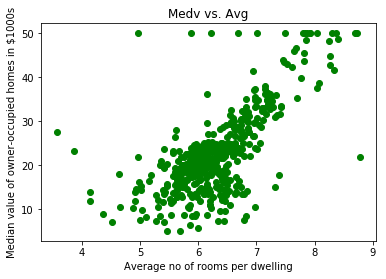

In [4]:
plt.scatter(avg_rooms, med_value_owner, color='green')
plt.xlabel('Average no of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.title('Medv vs. Avg')
plt.show()

In [5]:
avg_rooms_mean = avg_rooms.mean()
medv_mean = med_value_owner.mean()

theta1 = (np.sum((avg_rooms - avg_rooms_mean) * (med_value_owner - medv_mean))) / (np.sum((avg_rooms - avg_rooms_mean) ** 2))
print("Value of theta1", theta1)
theta0 = medv_mean - (theta1 * avg_rooms_mean)
print("Value of theta0", theta0)

Value of theta1 9.10210898118031
Value of theta0 -34.67062077643857


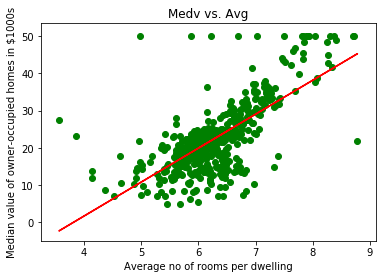

In [6]:
plt.plot(avg_rooms, theta0 + theta1 * avg_rooms, '-r')
plt.scatter(avg_rooms ,med_value_owner , color='green')
plt.xlabel('Average no of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.title('Medv vs. Avg')
plt.show()

In [7]:
features = dataset[['rm']]
X_train, X_test, y_train, y_test = train_test_split(features,med_value_owner, test_size= 0.3)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

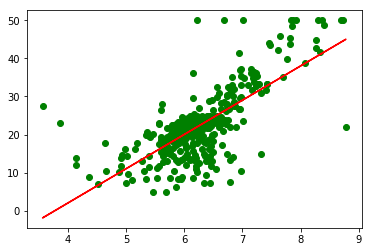

In [8]:
plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, reg.predict(X_train), color="red")
plt.show()

In [9]:
y_pred = reg.predict(X_test)
mse = metrics.mean_squared_error(y_pred,y_test)
print("Root Mean Squared Error : ", np.sqrt(mse))

Root Mean Squared Error :  7.094444945566743
